In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

plt.style.use('default')

In [80]:
restaurants = pd.read_csv('nyc_restaurants.csv', low_memory=False)

restaurants.drop_duplicates(subset=['search_result.results.restaurant_id'], inplace=True)
restaurants.dropna(subset=['search_result.results.faceted_rating_data.faceted_rating_list[0].positive_response_percentage'], inplace=True)
restaurants.dropna(subset=['search_result.results.ratings.rating_count'], inplace=True)

restaurants.shape

restaurants

,input.search_radius,input.longitude,input.latitude,input.auth_token,input.offset,search_result.results.restaurant_id,search_result.results.restaurant_hash,search_result.results.name,search_result.results.logo,search_result.results.description,...,search_result.facet_base_links,search_result.count_omitting_open_times.count,search_result.count_omitting_open_times.enabled,search_result.market_context.market_size,search_result.market_context.geohash,search_result.rewrite_context,search_result.intent_search_context,search_id,sponsored_result,search_metrics
0,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,NaN,91813,545b331f7635237e6d7f9bf41b041d55,Chopt Creative Salad Co.,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,NaN,9786,True,LARGE,dr5ruj,NaN,NaN,635aecca-05a4-11ea-87c3-a369837bced9,NaN,NaN
1,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,NaN,295880,c9125ca6c4d6b9b2269ed5aecfe18cfc,Just Salad Midtown West (W 49th St),https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,NaN,9786,True,LARGE,dr5ruj,NaN,NaN,635aecca-05a4-11ea-87c3-a369837bced9,NaN,NaN
2,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,NaN,1170611,57599ee345e8d6cf58e65e80f6dc68f3,Sushi Of Gari 46,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,NaN,9786,True,LARGE,dr5ruj,NaN,NaN,635aecca-05a4-11ea-87c3-a369837bced9,NaN,NaN
3,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,NaN,279875,04e47d9b944d05263abbbe79eea9bb44,Bareburger - Hell's Kitchen,https://media-cdn.grubhub.com/image/upload/v15...,NaN,...,NaN,9786,True,LARGE,dr5ruj,NaN,NaN,635aecca-05a4-11ea-87c3-a369837bced9,NaN,NaN
4,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,NaN,298614,ca52d561548a565c3e6914fbcc89567d,Ageha Sushi,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,NaN,9786,True,LARGE,dr5ruj,NaN,NaN,635aecca-05a4-11ea-87c3-a369837bced9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,99.0,1286179,4c0e649c7ce6c468c61f11a02a1ce5a7,KN Bakery,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,NaN,9788,True,LARGE,dr5ruj,NaN,NaN,33a5df4d-05a6-11ea-b35b-533bcd7d55f8,NaN,NaN
9841,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,99.0,433680,787e2c2cf0c2250396ce1c15f4f6689b,Parish New York,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,NaN,9788,True,LARGE,dr5ruj,NaN,NaN,33a5df4d-05a6-11ea-b35b-533bcd7d55f8,NaN,NaN
9842,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,99.0,1447576,9e79dcc7a2eb24c95f68ad5d90d7f7d0,Peace Garden Vegetarian Restaurant,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,NaN,9788,True,LARGE,dr5ruj,NaN,NaN,33a5df4d-05a6-11ea-b35b-533bcd7d55f8,NaN,NaN
9844,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,99.0,1263105,6dfc6b5cdd37abf551a6e6710c70e29f,La Oficina Grill & Bar,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,NaN,9788,True,LARGE,dr5ruj,NaN,NaN,33a5df4d-05a6-11ea-b35b-533bcd7d55f8,NaN,NaN


In [81]:
gdf = gpd.GeoDataFrame(
    restaurants,
    geometry=gpd.points_from_xy(
        restaurants['search_result.results.address.longitude'],
        restaurants['search_result.results.address.latitude'],
))

gdf

,input.search_radius,input.longitude,input.latitude,input.auth_token,input.offset,search_result.results.restaurant_id,search_result.results.restaurant_hash,search_result.results.name,search_result.results.logo,search_result.results.description,...,search_result.count_omitting_open_times.count,search_result.count_omitting_open_times.enabled,search_result.market_context.market_size,search_result.market_context.geohash,search_result.rewrite_context,search_result.intent_search_context,search_id,sponsored_result,search_metrics,geometry
0,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,NaN,91813,545b331f7635237e6d7f9bf41b041d55,Chopt Creative Salad Co.,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,9786,True,LARGE,dr5ruj,NaN,NaN,635aecca-05a4-11ea-87c3-a369837bced9,NaN,NaN,POINT (-73.98118 40.76115)
1,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,NaN,295880,c9125ca6c4d6b9b2269ed5aecfe18cfc,Just Salad Midtown West (W 49th St),https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,9786,True,LARGE,dr5ruj,NaN,NaN,635aecca-05a4-11ea-87c3-a369837bced9,NaN,NaN,POINT (-73.98714 40.76191)
2,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,NaN,1170611,57599ee345e8d6cf58e65e80f6dc68f3,Sushi Of Gari 46,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,9786,True,LARGE,dr5ruj,NaN,NaN,635aecca-05a4-11ea-87c3-a369837bced9,NaN,NaN,POINT (-73.98960 40.76067)
3,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,NaN,279875,04e47d9b944d05263abbbe79eea9bb44,Bareburger - Hell's Kitchen,https://media-cdn.grubhub.com/image/upload/v15...,NaN,...,9786,True,LARGE,dr5ruj,NaN,NaN,635aecca-05a4-11ea-87c3-a369837bced9,NaN,NaN,POINT (-73.99036 40.76055)
4,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,NaN,298614,ca52d561548a565c3e6914fbcc89567d,Ageha Sushi,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,9786,True,LARGE,dr5ruj,NaN,NaN,635aecca-05a4-11ea-87c3-a369837bced9,NaN,NaN,POINT (-73.98846 40.76452)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,99.0,1286179,4c0e649c7ce6c468c61f11a02a1ce5a7,KN Bakery,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,9788,True,LARGE,dr5ruj,NaN,NaN,33a5df4d-05a6-11ea-b35b-533bcd7d55f8,NaN,NaN,POINT (-73.92430 40.81793)
9841,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,99.0,433680,787e2c2cf0c2250396ce1c15f4f6689b,Parish New York,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,9788,True,LARGE,dr5ruj,NaN,NaN,33a5df4d-05a6-11ea-b35b-533bcd7d55f8,NaN,NaN,POINT (-73.98874 40.72051)
9842,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,99.0,1447576,9e79dcc7a2eb24c95f68ad5d90d7f7d0,Peace Garden Vegetarian Restaurant,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,9788,True,LARGE,dr5ruj,NaN,NaN,33a5df4d-05a6-11ea-b35b-533bcd7d55f8,NaN,NaN,POINT (-73.96866 40.75200)
9844,10,-73.995059,40.766669,1c3ed1d7-22c1-4933-a76c-81c309e336bb,99.0,1263105,6dfc6b5cdd37abf551a6e6710c70e29f,La Oficina Grill & Bar,https://res.cloudinary.com/grubhub/image/uploa...,NaN,...,9788,True,LARGE,dr5ruj,NaN,NaN,33a5df4d-05a6-11ea-b35b-533bcd7d55f8,NaN,NaN,POINT (-73.86021 40.69259)


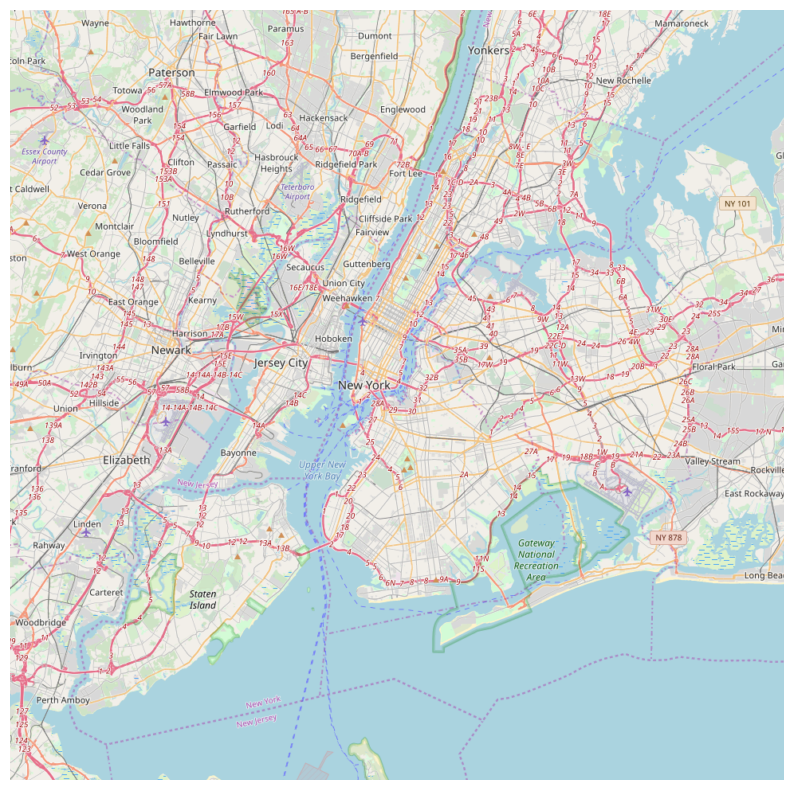

In [82]:
ax = gplt.webmap(boroughs, projection=gcrs.WebMercator(), figsize=(10, 10))

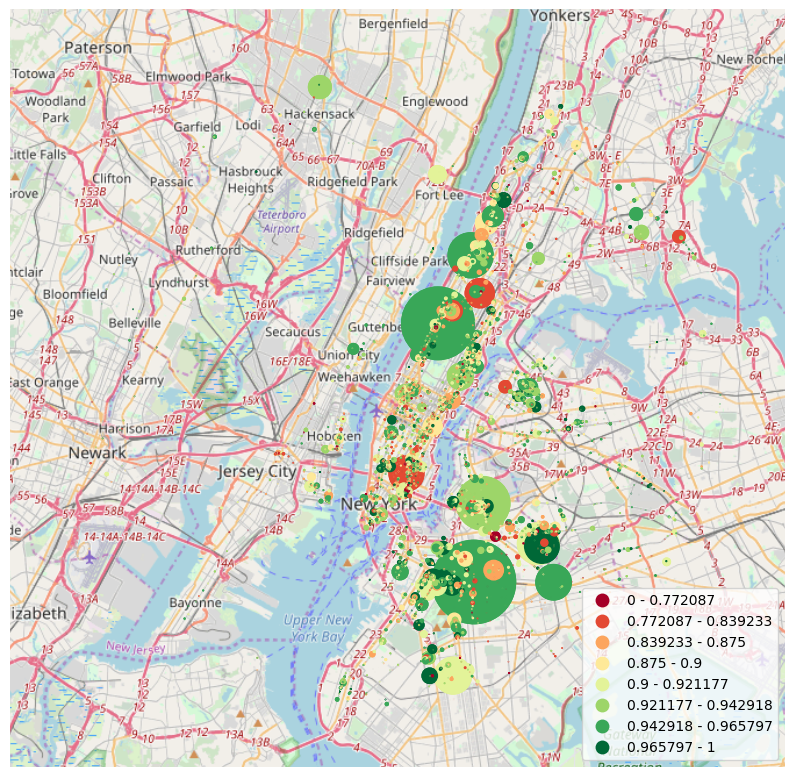

In [84]:
# https://residentmario.github.io/geoplot/gallery/plot_usa_city_elevations.html
def power_scale(minval, maxval):
    def scalar(val):
        val = val + abs(minval) + 1
        return (val / 2000) ** 2
    return scalar

gplt.pointplot(
    gdf,
    projection=gcrs.WebMercator(),
    hue='search_result.results.faceted_rating_data.faceted_rating_list[0].positive_response_percentage',
    scale='search_result.results.ratings.rating_count',
    scale_func=power_scale,
    k=8,
    cmap='RdYlGn',
    legend=True,
    ax=ax,
    legend_var='hue'
)

ax.figure

In [76]:
restaurants.sort_values(by='search_result.results.ratings.rating_count', ascending=False)[[
    'search_result.results.restaurant_id',
    'search_result.results.name',
    'search_result.results.ratings.rating_count',
    'search_result.results.faceted_rating_data.faceted_rating_list[0].positive_response_percentage',
]].head(20)

,search_result.results.restaurant_id,search_result.results.name,search_result.results.ratings.rating_count,search_result.results.faceted_rating_data.faceted_rating_list[0].positive_response_percentage
1350,205856,Sakura Tokyo,15489.0,0.944690
1258,304051,Opai Thai,14453.0,0.948520
836,272221,Sage,12387.0,0.925731
1069,915365,Geisha Sushi,11365.0,0.944339
1184,309646,Good Chinese Restaurant,10932.0,0.907706
1093,285249,El Paso Mexican Grill,10290.0,0.916520
1225,290542,Paphos Diner,10085.0,0.949346
2583,291711,East Village Farm & Grocery,10014.0,0.777672
1733,263600,Bombay Kitchen,9970.0,0.966380
1515,289109,Harlem Shake,9148.0,0.815441
